In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt



In [2]:
def difference(a):
    c = len(a)-1
    b = np.ones(c)
    b[:] = a[:-1] - a[1:]
    return b

In [5]:
s1 = np.genfromtxt("square_1.txt")
s2 = np.genfromtxt("square_2.txt")
s3 = np.genfromtxt("square_3.txt")

t1 = np.genfromtxt("tri_1.txt")
t2 = np.genfromtxt("tri_2.txt")
t3 = np.genfromtxt("tri_3.txt")


# dimension of the arrays
d = len(t1)
k = len(t1[0])

print(t1)

[[0.0207921 0.114851  0.103762  ... 1.        0.225512  1.       ]
 [0.0108911 0.106931  0.101584  ... 1.        0.223929  1.       ]
 [0.019802  0.113861  0.103762  ... 1.        0.223483  1.       ]
 ...
 [0.        0.10099   0.100198  ... 1.        0.260362  1.       ]
 [0.        0.10396   0.100792  ... 0.999999  0.260124  0.999998 ]
 [0.        0.10297   0.100594  ... 1.        0.259913  1.       ]]


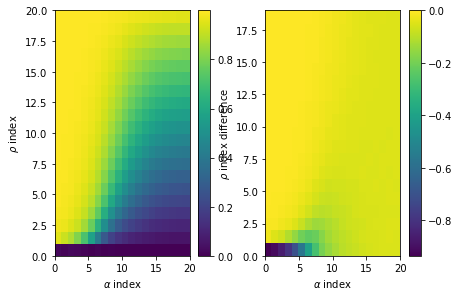

In [13]:
# difference in density

at1 = np.ones((4, d, int(k/4 - 1)))


for j in range(4):
    for i in range(d):
        at1[j, i, :] = difference(t1[i, j::4])

# TODO increase whitespace and fix axis labels

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
c1 = ax[0].pcolormesh(t1[:, ::4].T) 
c = ax[1].pcolormesh(at1[0].T)
fig.colorbar(c1, ax=ax[0])
fig.colorbar(c, ax=ax[1])
ax[0].set_xlabel(r"$\alpha$ index")
ax[1].set_xlabel(r"$\alpha$ index")
ax[0].set_ylabel(r"$\rho$ index")
ax[1].set_ylabel(r"$\rho$ index difference")
plt.savefig("test_difference.pdf", dpi=200, bbox_inches="tight")


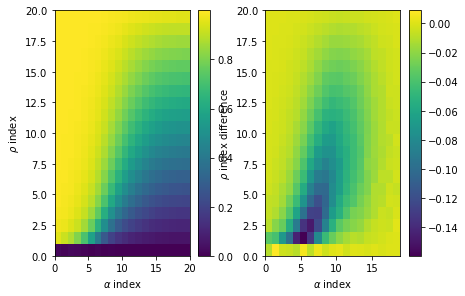

In [12]:
at1 = np.ones((4, d, int(k/4 - 1)))

def dif(M):
    j = np.ones((d, int((4*d)/4 - 1)))
    for i in range(d):
        for k in range(d-1):
            j[i, k] = M[k+1, 4*i] - M[k, 4*i]
    return j

J = dif(t1)


# TODO increase whitespace and fix axis labels

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
c1 = ax[0].pcolormesh(t1[:, ::4].T) 
c = ax[1].pcolormesh(J)
fig.colorbar(c1, ax=ax[0])
fig.colorbar(c, ax=ax[1])
ax[0].set_xlabel(r"$\alpha$ index")
ax[1].set_xlabel(r"$\alpha$ index")
ax[0].set_ylabel(r"$\rho$ index")
ax[1].set_ylabel(r"$\rho$ index difference")
plt.savefig("test_difference_alpha.pdf", dpi=200, bbox_inches="tight")

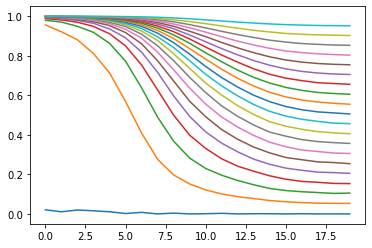

In [14]:
fug = plt.figure()
for i in range(d):
    plt.plot(np.arange(0, d), t1[:, 4*i])
plt.show()

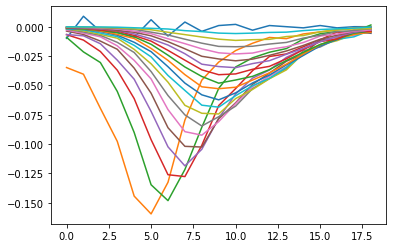

In [17]:
fug = plt.figure()
for i in range(d):
    o = np.ones(d-1)
    o[:] = t1[1:, 4*i] - t1[:-1, 4*i]
    plt.plot(np.arange(0, d-1), o)
plt.show()

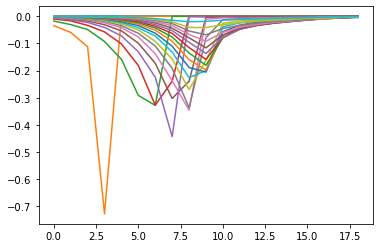

In [18]:
fug = plt.figure()
for i in range(d):
    o = np.ones(d-1)
    o[:] = t3[1:, 4*i] - t3[:-1, 4*i]
    plt.plot(np.arange(0, d-1), o)
plt.show()

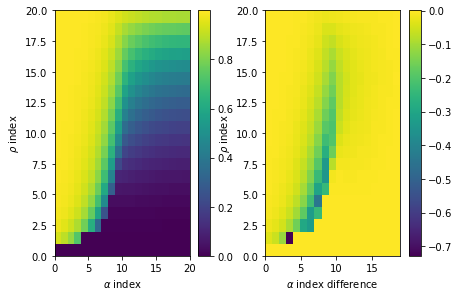

In [25]:
J = dif(t3)


# TODO increase whitespace and fix axis labels

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
c1 = ax[0].pcolormesh(t3[:, ::4].T) 
c = ax[1].pcolormesh(J)
fig.colorbar(c1, ax=ax[0])
fig.colorbar(c, ax=ax[1])
ax[0].set_xlabel(r"$\alpha$ index")
ax[1].set_xlabel(r"$\alpha$ index difference")
ax[0].set_ylabel(r"$\rho$ index")
ax[1].set_ylabel(r"$\rho$ index")
plt.savefig("test_difference_alpha.pdf", dpi=200, bbox_inches="tight")